# Graph Database Benchmark, Arcade/SQL Performance Results

**WORKING IN PROGRESS** *This report is similar to the [main quert performance report](querying-results.ipynb). Here, we're reporting the first results from tests done with ArcadeDB and queries made in its SQL dialect, [reported here](biopax-arcsql-results.tsv). These results are provisional and to be completed in future.*


In [1]:
# Some common initialiasion
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.core.display import HTML

# As said in the main notebook, this is in the same dir where this notebook is
import query_reports as qrep

pd.set_option ( 'display.max_columns', 500 )

## Queries and Query Categories
As explained in the main [README][10], we have the following queries and query categories:

[10]: https://github.com/Rothamsted/graphdb-benchmarks/tree/master#readme

In [2]:
# This normally generated as stated in the original notebook. Here we're cutting it to an 
# abstract, since we have only run a subset of tests.
#
all_queries = {
  "counts": [
    "cnt",
    "cntType",
    "cntRel",
    "cntRelType"
  ],
  "selects": [
    "sel",
    "join",
    "joinRel",
    "joinFilter",
    "joinRe",
    "joinReif"
  ]
}

And we have tested them against different datasets and graph databases:

In [3]:
# Internal ID -> Label used here
datasets = { 
  "biopax": "biopax"
}

# internal ID => Label Used Here
databases = {
  "sparql": "virt",
   "neo": "neo",
   "arcade": "arc",
   "arcsql": "arcSQL"
}

We ran all the queries for each combination of dataset/DB, and produded 1 result file for each of them:

In [4]:
raw_results = qrep.get_raw_results ( datasets, databases )

## Results summaries
In the tables below, a per-category summary of all the times taken in the various combinations of datasets and databases.

*Note: where the time is 'inf' and sdev is '-', it's because no query succeded to complete before a set timeout of 20s.*

In [5]:
# You can skip the following code if you're interested in the resulting tables only.
data_summaries = qrep.get_all_summary_data ( datasets, databases, all_queries, raw_results )

,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,biopax/arcSQL Time,biopax/arcSQL sdev
Name,,,,,,,,
cnt,220.441176,7.650242,0.413793,0.494649,177.125874,15.744378,3.000000,0.577350
cntType,3.931034,17.704200,4.700935,5.291886,186.060870,5.155966,7.533333,10.322421
cntRel,10.192661,0.396210,0.408000,0.493441,554.766667,18.666347,2.909091,0.943880
cntRelType,15.489209,28.341951,6.571429,6.282701,7.760274,90.103489,28.800000,33.870341


,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,biopax/arcSQL Time,biopax/arcSQL sdev
Name,,,,,,,,
sel,6.323529,0.980418,1.177778,0.689653,2.814159,7.815448,18.400000,49.069565
join,5.664122,0.708310,2.395161,15.084488,17.535088,1.130274,3.000000,0.500000
joinRel,7.180952,0.386825,1.442478,0.865387,2.792593,1.072703,3.333333,0.816497
joinFilter,5.163636,0.567099,10.860656,0.964798,0.740741,1.071032,3.642857,0.633324
joinRe,5.916667,0.791575,11.542373,0.902457,27.408333,4.698464,3.333333,0.651339
joinReif,7.752475,0.555085,1.698113,0.571878,12.571429,83.101385,179.909091,13.874109


## Result Charts

We can use the tables above to show the data in bar charts. Again, we're showing one chart per category.
*Note: for the queries that timed out in all the repetitions, we set a conventional high time (see the code below for details).*

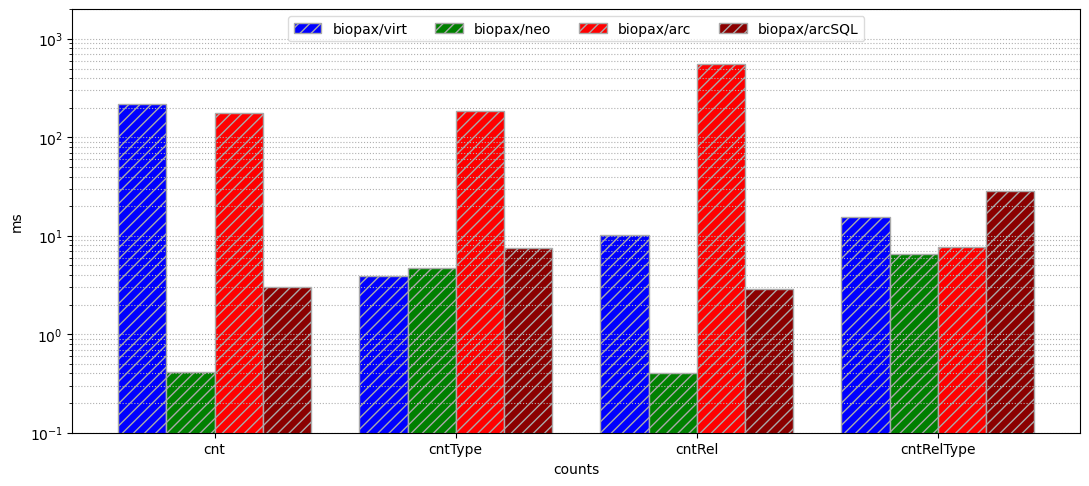

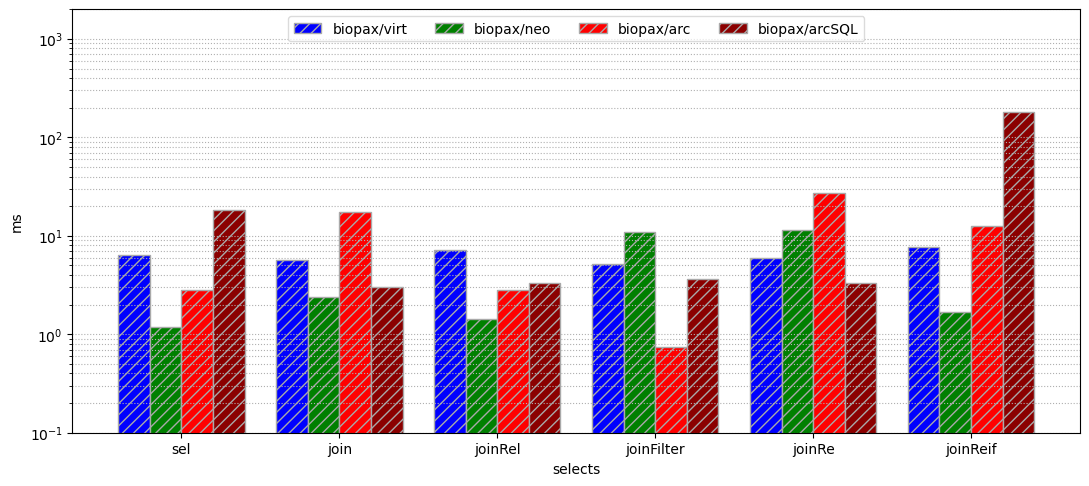

In [6]:
# You can skip the following code if you're interested in the resulting charts only.
qrep.query_charts ( datasets, databases, all_queries, data_summaries )

## Some Analysis

* TODO. Actually, **the new arcSQL column can't be compared with the other datasets/DBs yet**, since the test wasn't run on the same hardware/database setting. For the moment, we can only compare the queries for this case one each other. A first result from that is that times are similar, except for joinRef, for which we still don't know wny it takes significantly longer than the rest. 